In [3]:
%%HTML
<!-- Run this code block first -->
<!-- !!DO NOT DELETE!! -->
<link rel="stylesheet" type="text/css" href="Resources/Styles/styles.css">

<div class = "main-container">
    <div class = "inner_container">
        <img src="Resources/Images/Multiverse_Logo.png" class = 'image_style' />
    </div>
</div>

<div class = 'main-container'>
    <div class = 'inner_container'>
        <h1><mark class = "highlight_green">Titan Engineering starter code</mark></h1>
                <p>A mechanical and engineering company needs your help to understand the carbon emissions of their ships.<br><br><b>Information which you will require for this project, including stakeholders, deliverables and data dictionaries can be found in the project brief.</b></p>
    </div>
</div>

In [85]:
# import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

In [ ]:
# import data

titan_data_tests = pd.read_csv(
    r"C:\Users\duffyl\OneDrive - Arriva\Documents\repos\multiverse\data_analytics_hackathon\data\titan_tests.csv"
)

# On second brief we added this new dataset
titan_data_boats = pd.read_csv(
    r"C:\Users\duffyl\OneDrive - Arriva\Documents\repos\multiverse\data_analytics_hackathon\data\titan_boats.csv"
)

# Join original dataset to new on serial number
titan_data = titan_data_tests.merge(titan_data_boats, on="Serial number", how="left")


# display(titan_data_tests.head())
# display(titan_data_boats.head())

display(titan_data.head())



,Test ID,Serial number,Emissions,Air temperature,Average speed,Water temperature,Water depth,Distance from shore,Wind speed,Wind direction,Humidity,Air pressure,Model,Displacement,Mast height,Length,Beam,Ballast water capacity,Number of engines,Maximum cruise speed
0,ST6319,AC5255,1451.52,10.03,8.07,12.00,482.12,24.78,14.95,SE,65.80,1017.06,Annan Class,6510.09,60.58,136.31,17.68,1219.81,4,28
1,ST4589,AC2758,1296.71,0.10,11.56,2.98,395.60,9.75,28.06,ENE,69.45,1003.61,Annan Class,6516.56,63.27,139.57,17.63,1244.10,4,28
2,ST5741,LC2916,1244.59,0.46,17.07,1.17,726.97,44.69,19.77,ENE,71.77,1008.44,Lochmaben Class,7743.20,65.18,150.61,19.30,1543.26,2,30
3,ST3015,LC3164,940.04,-1.03,13.06,3.44,777.74,19.38,19.80,ENE,70.05,1010.43,Lochmaben Class,8042.72,70.18,149.39,20.79,1542.87,2,30
4,ST8382,MC2636,1358.87,0.63,19.12,2.45,978.08,59.19,18.77,S,83.86,999.99,Moffat Class,9132.76,72.46,160.64,21.24,1832.78,3,32


In [97]:
# enter code from here
# Explore data types
titan_data.dtypes

Test ID                    object
Serial number              object
Emissions                 float64
Air temperature           float64
Average speed             float64
Water temperature         float64
Water depth               float64
Distance from shore       float64
Wind speed                float64
Wind direction             object
Humidity                  float64
Air pressure              float64
Model                      object
Displacement              float64
Mast height               float64
Length                    float64
Beam                      float64
Ballast water capacity    float64
Number of engines           int64
Maximum cruise speed        int64
dtype: object

In [98]:
# Make a new field in df for the condition
# warm > 14, average between 4 and 14,cold < 4
# As there are 2 sets of temperature (air and water), we should creat fields for both conditions, so the data can be maximally explored.
# Came across this lambda thing that was used previously, but probably best making a function so it can be 
# extended more easily

# Deal with the Air condition first
titan_data["air_condition"] = titan_data["Air temperature"].apply(
    lambda x: "warm condition" if x > 14 else ("average condition" if x >= 4 and x <= 14 else "cold condition")
)

# Deal with the water condition 
titan_data["water_condition"] = titan_data["Water temperature"].apply(
    lambda x: "warm condition" if x > 14 else ("average condition" if x >= 4 and x <= 14 else "cold condition")
)

display(titan_data.head())

,Test ID,Serial number,Emissions,Air temperature,Average speed,Water temperature,Water depth,Distance from shore,Wind speed,Wind direction,...,Model,Displacement,Mast height,Length,Beam,Ballast water capacity,Number of engines,Maximum cruise speed,air_condition,water_condition
0,ST6319,AC5255,1451.52,10.03,8.07,12.00,482.12,24.78,14.95,SE,...,Annan Class,6510.09,60.58,136.31,17.68,1219.81,4,28,average condition,average condition
1,ST4589,AC2758,1296.71,0.10,11.56,2.98,395.60,9.75,28.06,ENE,...,Annan Class,6516.56,63.27,139.57,17.63,1244.10,4,28,cold condition,cold condition
2,ST5741,LC2916,1244.59,0.46,17.07,1.17,726.97,44.69,19.77,ENE,...,Lochmaben Class,7743.20,65.18,150.61,19.30,1543.26,2,30,cold condition,cold condition
3,ST3015,LC3164,940.04,-1.03,13.06,3.44,777.74,19.38,19.80,ENE,...,Lochmaben Class,8042.72,70.18,149.39,20.79,1542.87,2,30,cold condition,cold condition
4,ST8382,MC2636,1358.87,0.63,19.12,2.45,978.08,59.19,18.77,S,...,Moffat Class,9132.76,72.46,160.64,21.24,1832.78,3,32,cold condition,cold condition


,Test ID,Serial number,Emissions,Air temperature,Average speed,Water temperature,Water depth,Distance from shore,Wind speed,Wind direction,Humidity,Air pressure,air_condition,water_condition,water_depth
0,ST6319,AC5255,1451.52,10.03,8.07,12.00,482.12,24.78,14.95,SE,65.80,1017.06,average condition,average condition,more than 50m
1,ST4589,AC2758,1296.71,0.10,11.56,2.98,395.60,9.75,28.06,ENE,69.45,1003.61,cold condition,cold condition,more than 50m
2,ST5741,LC2916,1244.59,0.46,17.07,1.17,726.97,44.69,19.77,ENE,71.77,1008.44,cold condition,cold condition,more than 50m
3,ST3015,LC3164,940.04,-1.03,13.06,3.44,777.74,19.38,19.80,ENE,70.05,1010.43,cold condition,cold condition,more than 50m
4,ST8382,MC2636,1358.87,0.63,19.12,2.45,978.08,59.19,18.77,S,83.86,999.99,cold condition,cold condition,more than 50m


In [99]:
# Lets deal with the other environmental factors like water depth
# and add a new column specifing deep and shallow water

# Set column for water depth
titan_data["water_depth"] = titan_data["Water depth"].apply(
    lambda x: "more than 50m" if x > 50 else ("50m or less")
)

display(titan_data.head())

,Test ID,Serial number,Emissions,Air temperature,Average speed,Water temperature,Water depth,Distance from shore,Wind speed,Wind direction,...,Displacement,Mast height,Length,Beam,Ballast water capacity,Number of engines,Maximum cruise speed,air_condition,water_condition,water_depth
0,ST6319,AC5255,1451.52,10.03,8.07,12.00,482.12,24.78,14.95,SE,...,6510.09,60.58,136.31,17.68,1219.81,4,28,average condition,average condition,more than 50m
1,ST4589,AC2758,1296.71,0.10,11.56,2.98,395.60,9.75,28.06,ENE,...,6516.56,63.27,139.57,17.63,1244.10,4,28,cold condition,cold condition,more than 50m
2,ST5741,LC2916,1244.59,0.46,17.07,1.17,726.97,44.69,19.77,ENE,...,7743.20,65.18,150.61,19.30,1543.26,2,30,cold condition,cold condition,more than 50m
3,ST3015,LC3164,940.04,-1.03,13.06,3.44,777.74,19.38,19.80,ENE,...,8042.72,70.18,149.39,20.79,1542.87,2,30,cold condition,cold condition,more than 50m
4,ST8382,MC2636,1358.87,0.63,19.12,2.45,978.08,59.19,18.77,S,...,9132.76,72.46,160.64,21.24,1832.78,3,32,cold condition,cold condition,more than 50m


In [ ]:
# New df to hold avg emissions for air_condition and water_condition


# Added new group by for model, and new column in correct order for model, it added more rows per each breakdown
avg_emissions_air = titan_data.groupby(["Model", "air_condition", "water_depth"])["Emissions"].mean().reset_index()
avg_emissions_air.columns = ["Model", "air_condition", "water_depth", "avg_emissions"]

avg_emissions_water = titan_data.groupby(["Model", "water_condition", "water_depth"])["Emissions"].mean().reset_index()
avg_emissions_water.columns = ["Model", "water_condition", "water_depth", "avg_emissions"]

display(avg_emissions_air.head(20))
display(avg_emissions_water.head(20))

,Model,air_condition,water_depth,avg_emissions
0,average condition,50m or less,Annan Class,1203.705000
1,average condition,50m or less,Lochmaben Class,1072.740000
2,average condition,50m or less,Moffat Class,1363.025714
3,average condition,more than 50m,Annan Class,1206.064286
4,average condition,more than 50m,Lochmaben Class,978.706667
5,average condition,more than 50m,Moffat Class,1216.242727
6,cold condition,50m or less,Annan Class,985.990000
7,cold condition,50m or less,Lochmaben Class,834.550000
8,cold condition,50m or less,Moffat Class,1122.183333
9,cold condition,more than 50m,Annan Class,1143.128000


,Model,water_condition,water_depth,avg_emissions
0,average condition,50m or less,Annan Class,1203.705000
1,average condition,50m or less,Lochmaben Class,1125.672500
2,average condition,50m or less,Moffat Class,1420.201429
3,average condition,more than 50m,Annan Class,1186.330000
4,average condition,more than 50m,Lochmaben Class,978.706667
5,average condition,more than 50m,Moffat Class,1191.375455
6,cold condition,50m or less,Annan Class,985.990000
7,cold condition,50m or less,Lochmaben Class,834.550000
8,cold condition,50m or less,Moffat Class,1206.686000
9,cold condition,more than 50m,Annan Class,1150.772500


In [106]:
# Air condition vs Water Depth bar chart

# df = avg_emissions_air[avg_emissions_air['water_depth'] == "more than 50m"]

df = avg_emissions_air.pivot(index="air_condition", columns="water_depth", values="avg_emissions")

plt.figure()
# plt.bar(df["air_condition"].astype(str), df["avg_air_emissions"])
df.plot(kind="bar")
plt.xlabel("Air condition")
plt.ylabel("Average emissions")
plt.title("Average Emissions by Air Condition and Water Depth")
plt.xticks(rotation=0)
plt.tight_layout()

# for i, v in enumerate(df["avg_air_emissions"]):
#     plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")

plt.show()


ValueError: Index contains duplicate entries, cannot reshape

<Figure size 640x480 with 0 Axes>

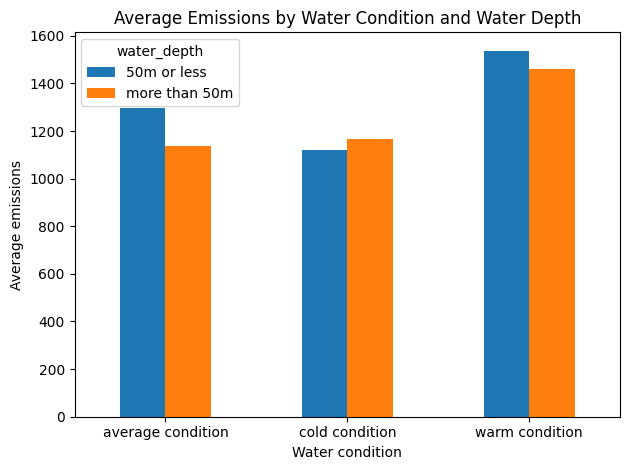

In [71]:
# Water condition vs Water Depth bar chart

df = avg_emissions_water.pivot(index="water_condition", columns="water_depth", values="avg_emissions")

plt.figure()
# plt.bar(df["air_condition"].astype(str), df["avg_air_emissions"])
df.plot(kind="bar")
plt.xlabel("Water condition")
plt.ylabel("Average emissions")
plt.title("Average Emissions by Water Condition and Water Depth")
plt.xticks(rotation=0)
plt.tight_layout()

# for i, v in enumerate(df["avg_air_emissions"]):
#     plt.text(i, v, f"{v:.2f}", ha="center", va="bottom")

plt.show()


In [87]:
# Get max avg emissions for each condition, for chart tick marks, to make it dynamic
max_emission_avg = max(avg_emissions_air['avg_emissions'].max().max(), avg_emissions_water['avg_emissions'].max().max())
tick_mark_max = math.ceil(max_emission_avg / 100) * 100
print(tick_mark_max)

1600


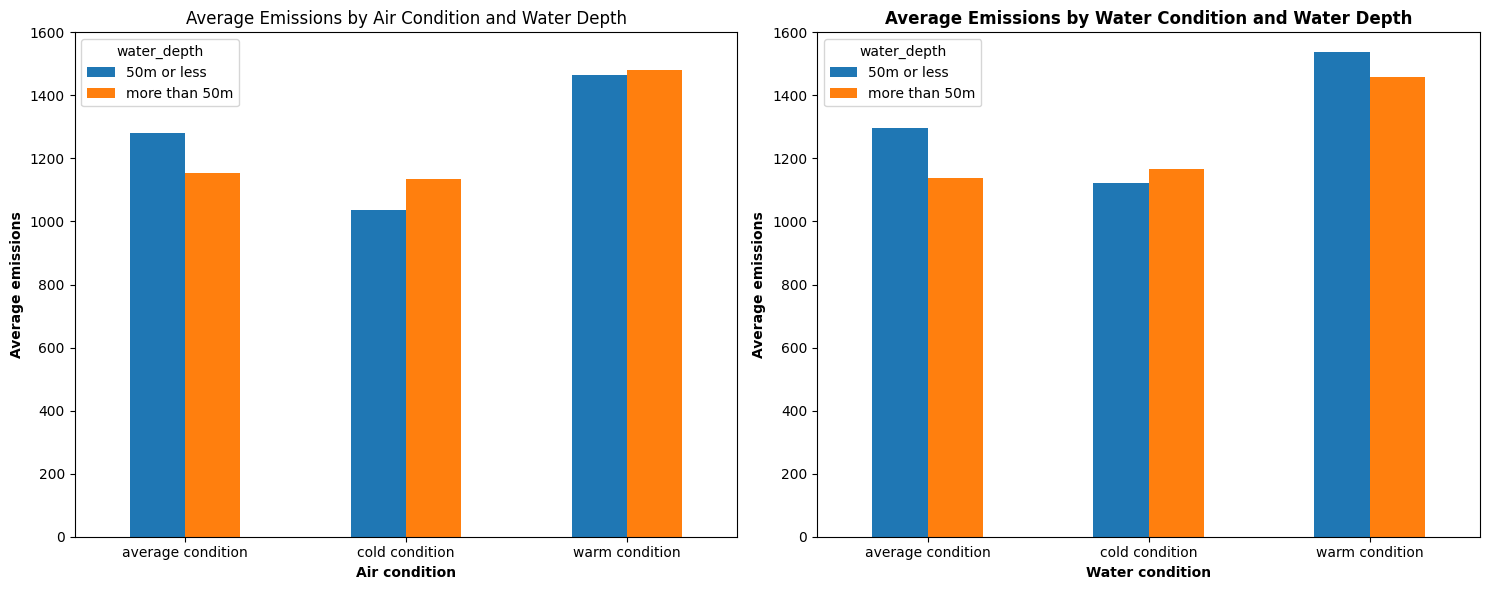

In [91]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Air condition chart
df1 = avg_emissions_air.pivot(index="air_condition", columns="water_depth", values="avg_emissions")
df1.plot(kind="bar", ax=ax1)
ax1.set_xlabel("Air condition", fontweight='bold')
ax1.set_ylabel("Average emissions", fontweight='bold')
ax1.set_title("Average Emissions by Air Condition and Water Depth")
ax1.tick_params(axis='x', rotation=0)
ax1.set_ylim(0, tick_mark_max)

# Water condition chart
df2 = avg_emissions_water.pivot(index="water_condition", columns="water_depth", values="avg_emissions")
df2.plot(kind="bar", ax=ax2)
ax2.set_xlabel("Water condition", fontweight='bold')
ax2.set_ylabel("Average emissions", fontweight='bold')
ax2.set_title("Average Emissions by Water Condition and Water Depth", fontweight='bold')
ax2.tick_params(axis='x', rotation=0)
ax2.set_ylim(0, tick_mark_max)

plt.tight_layout()
plt.show()
